<a href="https://colab.research.google.com/github/NegoitaAdrian18/Tensorflow_projects/blob/main/01_Neuronal_Network_Regresion_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a regresion problem? 

> Example regression problem: 
  - "How much will this house sell for? "
  - "Hoe many people will buy this app? "
  - etc.

OBS|| It's predicting  a number of some sort. 

* Architecture of a neuronal network regresion model.
* Input shapes and output shapes of a regression model (features and labels) 
* Creating custom data to view and fit;
* Steps in modeling;
* Creating a model, compiling a model, fitting a model, evaluating a model;
* Different evaluation methods;
* Saving and loading models. 


 # Regression Inputs and Outputs

* Exemplu: In prezicerea pretului de vanzare al unei case:

  - Inputs (Indepent variable):
                                nr. de dormitoare;
                                nr. de bai;
                                nr de garaje.
  - Outputs : Pretul casei

# 1. Introduction to regression with neuronal networks in TensorFlow

  > Simple definiton of a regression problem: predicting numerical variable based on some other combination of variables (predicting a number based on some ohter numbers) 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


  > Creating data to view and fit

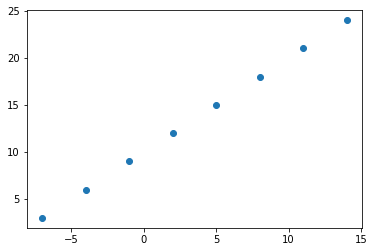

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

  # Create features (intrarile):
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

  # Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

  # Visualize
plt.scatter(X, y)

In [ ]:
y == X + 10 # relatia (functia) dintre X si y ( our input features and our labels) (our independent variables and dependent varianle)

array([ True,  True,  True,  True,  True,  True,  True,  True])

  > Input and output shapes

In [ ]:
# Creating a demo tensor for our house predicion price problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])  # OBS|| In realitate sunt introduse valori numerice
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Turn Numpy arrays into Tensors

#X=tf.constant(X)   Asa am valoarea default dtype = 64
#y=tf.constant(y)   Asa am valoarea default dtype = 64

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

  > Steps in modeling with TensorFlow

  1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
  2. Compiling a model 
                       - define the loss function (in other words, the function which tells our model how wrong it is)
                       - define the optimizer ( tells our model how to improve the paterns its learning) 
                       - evaluation matrics (what we can use to improve the performance of our model)
  3. Fitting a model - letting the model try to find patterns between X & y  ( features and labels) 

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([             # astfel ii spun algoritmului TensorFlow sa creeze un model si sa treci secvential prin el 
    tf.keras.layers.Dense(1)              # Am realizat doar un strat  (layer) deoarece in acest caz vreau ca modelul sa ia ca input un numar si sa prezica un numar la iesire (output)                         
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # prin setarea "epochs = 5 " ii spun modelului sa treaca de 5 ori prin valorile lui X si ale lui y si sa gaseasca legaturi







Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using the model:

y_predict = model.predict([17.0])   # Am setat valoarea lui X = 17.0 si incerc sa prezic ce valoare va avea y
y_predict

array([[12.716021]], dtype=float32)

In [ ]:
y_predict + 10.9748

array([[23.69082]], dtype=float32)

> **Improving the model**

  > We can improve our model, by altering the steps we took to create a model.

  1. **Creating a model** - here we might add more layers, increase the number of hideen units (all called neurons) within each of the hideen layers, change the activation function of each layer. 
  2. **Compiling a model** - here we might change the optimization function or perphaps the **learning rate** of the optimization function.
  3. **Fitting a model** - here we might fit a model for more  **epochs** ( leave it training for longer) or on more data ( give the model more examples to learn from).




In [ ]:
# Rebuild the model

# A)

# 1. Create the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (for epochs = 100)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
# B) 

# 1. Creaete the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics = ['mae'])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

model.predict([17.0])


In [ ]:
# C

# 1. Create the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

model.predict([17.0])


In [ ]:
# D

# 1. Create the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. COmpile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


# Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

model.predict([17.0])

  > Evaluating the model

    > In practice, a typial workflow you'll go through when building neural network is:
    ''' Build a model -> fit it -> evaluate it -> tweak a model (ajusteaza modelul)  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ... '''


    ->  When it comes to evaluation, i should visualize:
      - the data - what data are we working with? what does it look like?
      - the model itself - what does our model look like ?
      - the training of a model - how does a model perform while it learns?
      - the prediciton of the model - how do the predicitons of a model line up against the ground truth (the labels) ?
  




In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset

y = X + 10   # => Aceasta este formula pe care modelul vreau sa o invete ( )
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

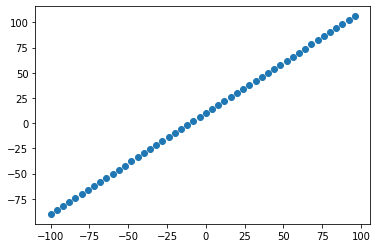

In [ ]:
# Visualize teh data

import matplotlib.pyplot as plt

plt.scatter(X, y)

   * Concept of the 3 sets 

    - Training set = model learn from this data, which is typicaly 70 -80 % of the total data you have available.
    - Validation set = the model gets tuned on this data, which is typicaly 10 - 15 % of the data available.
    - Test set = model gets evaluated on this data to set what is has learned, this set is typicaly 10 - 15 % of the total data available.

In [ ]:
# Check the lenght of how many samples we have

len(X)

50

In [ ]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples ( 80 % of the data )
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples ( 10 % of the data )
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

  * Visualing the data in training and test sets 

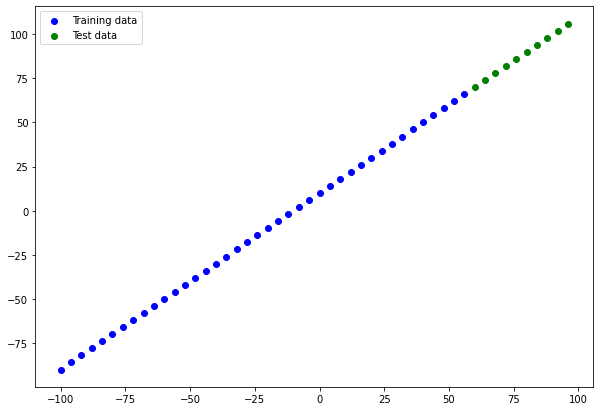

In [ ]:
plt.figure(figsize=(10, 7))
#Plot training data 
plt.scatter(X_train, y_train, c='b', label="Training data")

#Plot test data
plt.scatter(X_test, y_test, c='g', label='Test data')

plt.legend()

  > Building a neural network for our data

In [ ]:
# 1. Create a model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compiling the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model

#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

  > Visualizing the model

In [ ]:
model.summary()

# New Section

# New Section

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Creating a model which builds automaticaly by defining the "input_shape" argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),   # Am definit "input_shape =1" deoarece in acest exmplu am nevoie sa preziv un numar pe baza altuia. De asemenea pot defini input_shape si 
                           tf.keras.layers.Dense(1, name="output_layer")                    # reprezentand cum am facut mai sus: "X[0] si y[0]" putand vedea astfel ca indexului dat ii corespunde un numar.                           
], name='Model')


# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


>Fully connected layer means = all of the neurons from a network in the first layer are connected to all the  neurons in the next (second) layer. It is the same as a "Dense" (Dense connections)  layer

**
> **Total params** = total number of parameters in the model (these are the paterns that the model is going to learn

> **Trainable params** = the parameters (patterns) the model can update as it trains.

> **No-trainable params** = these params aren't updated during training (this is typical when you bring in already learn patterns or paramenters from other models during **transfer learning**)

  OBS|| In this case the Total number of params is equal to the Trainable parameters, that means all the in the model are trainable so they can be updated.

  OBS|| When we import a model that is already learned patterns in data what we might do is freeze those learned patterns. In that case, it might have a whole bunch of non trainable parameters because we want that model that has already learned on data to keep its existing paterns. We just want to train a few parameters and apply it to our own problem.


**

** Resursa de studiu:  Fundamental of neural network on wights(metrics) and biases(vectors)**

** For more in-depth overview  of the trainable parameters within a layer => MIT's introduction of deep learning video.**


In [ ]:
 # Fit the modeel to the training data

 model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


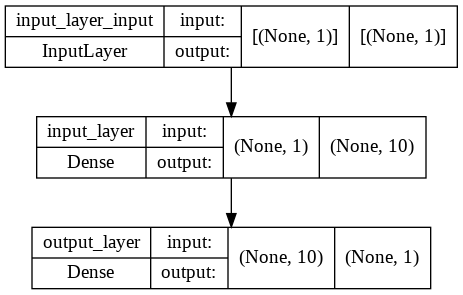

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

  > Visualizing model predictions

      - To visualize predictions, it's a good idea to plot them against the ground truth labels.

      - Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model's predictions)
      

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred                            # reprezint valorile pe care le doresc sa fie cat mai aproape de valorile din X_test

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Creating a ploting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data  =X_test,
                     test_labels = y_test,
                     predictions = y_pred):

  """ Plots training data, test data and compares predictions to ground truth labels. 
  """

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  plt.scatter(test_data, test_labels, c='g', label='Testing data') 
  # PLot model's prediction
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  plt.legend()

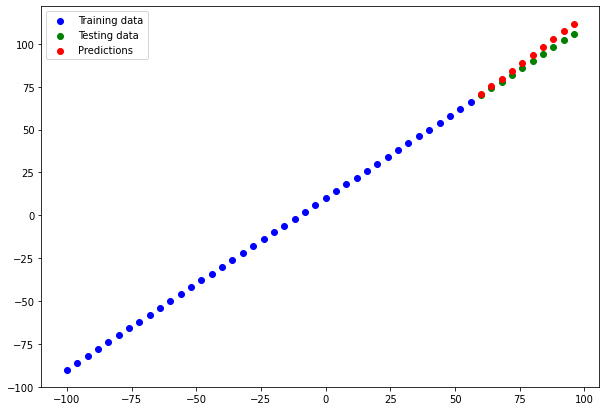

In [ ]:
plot_predictions()

  > **Evaluating our model's predictions with regression evaluation metrics**

    > Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

    > Since we're working on a regresion, 2 of the main metrics:
    * MAE - mean absolut error = on average, how wrong is each of my model's predictions
    * MSE - mean square error = square the average errors

In [ ]:
# Evaluate the model on the test

model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 151ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

  * In continuare voi compara y_pred cu y_test

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the Mean Absolute Error

mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                               y_pred = tf.squeeze(tf.constant(y_pred)))   # Deoarece "shapes" erau diferite, iar pt a realiza comparatie , tensorii trebui sa fie de aceeasi forma

mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the Mean Square Error 

mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(tf.constant(y_pred)))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse MAE and MSE 

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = tf.squeeze(tf.constant(y_pred)))
  

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                       y_pred = tf.squeeze(tf.constant(y_pred)))

  * Running experiments to improve our model 

  - Workflow: Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it ->  etc. 

Ways that we can improve our model:

 1. Get more data - get more examples for your model to train on ( more opportunities to learn paterns or realationships between features and labels ).

 2. Make your model larger ( using a more complex model ) - this might come in the form of more layers or more hidden units in each layer. 

 3. Train for longer - give your model more of a chance to find patterns in the data. 


**Exercitiu**

 3 modelling experiments: 

    model_1 - same as the original model: 1 layer, trained for 100 epochs

    model_2 - 2 layers, trained for 100 epochs

    model_3 - 2 layers, trained for 500 epochs

    

**Build model_1**

In [ ]:
# Set the random seed 

tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)  
])

# 2. Compile the model 

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model 

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

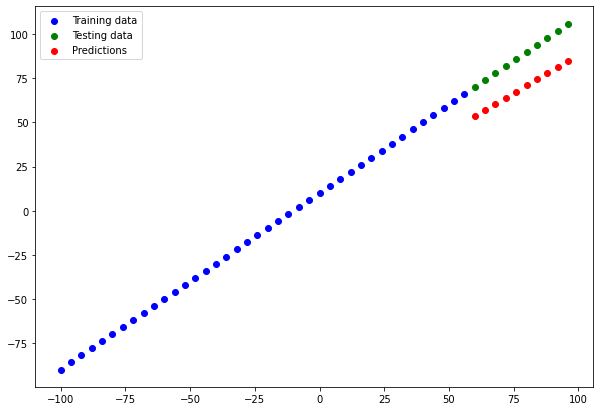

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluaton metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

In [ ]:
# Set the rendom seed 
tf.random.set_seed(42)

# 1. Create the model

model_2 = tf.keras.Sequential([
                               #tf.keras.layers.Dense(50, activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the mode

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])


# 3. Fit it 

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

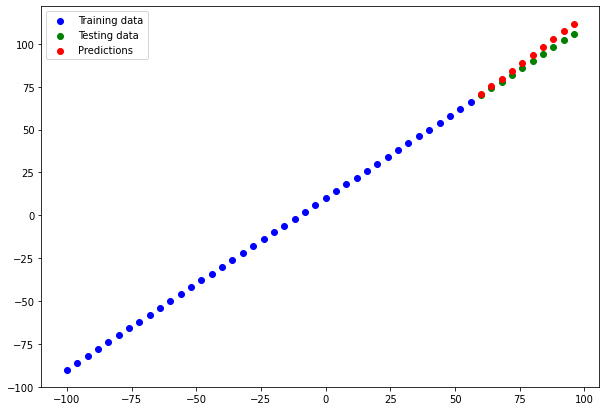

In [ ]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)



In [ ]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model_3**

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create the model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

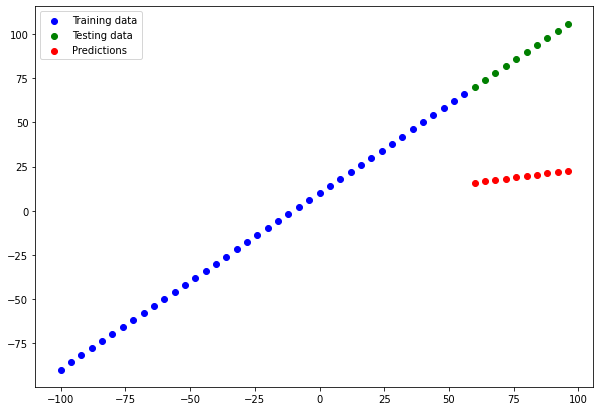

In [ ]:
# Make and plot predicitons of model_3

y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# Calculate model_3 evalaution metrics

mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

  **Comparing and tracking TensorFlow modelling experiments**

In [ ]:
# Comparing model results using  pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results,columns=['model', 'mae', 'mse'])   
all_results        

,model,mae,mse
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(353.57336, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(3.1969407, shape=(), dtype=float32)","tf.Tensor(13.070143, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(68.713615, shape=(), dtype=float32)","tf.Tensor(4808.0273, shape=(), dtype=float32)"


In [ ]:
import pandas as pd


model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns= ['model', 'mae', 'mse', ])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()  # Acest model a obtinut cele mai bune rezultate

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Tracking your experiments**

**OBS||** In machine learning modelling is indicated to track the results of your experiments

**Bibliografie** As you  build more models, you'll want to look into using:

> TensorBoard -  a component of the TensorFlow library to help track modelling experiments;

> Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

  **Saving the models**

      Saving our models allows us to use them outside of Google Colab ( or where they were trained ) such as in web applicaton or mobile app.

      There are 2 main formats we can save our model's too:

          1. The SaveModel format

          2. The HDF5 format

In [ ]:
# Save model using the SaveModel format

model_2.save("Model_2_saved")

INFO:tensorflow:Assets written to: Model_2_saved/assets


In [ ]:
# Save model using HDF5 format

model_2.save("Model_2_saved.h5")

## **Load and use a saved TensorFlow model**

In [ ]:
# Load in the SavedModel format model 

loaded_Model_2_saved = tf.keras.models.load_model("/content/Model_2_saved")
loaded_Model_2_saved.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


  **Compare model_2 predictions with SavedModel format model predictions**

In [ ]:
model_2_pred = model_2.predict(X_test)
loaded_Model_2_saved_pred = loaded_Model_2_saved.predict(X_test)

model_2_pred == loaded_Model_2_saved_pred                   # Am comparat cele 2 modele direct


# Obser || Daca de exemplu nu au aceeasi forma => False. In clc. trebuie verificate toate aspectele daca rezulattul este False


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_pred, loaded_Model_2_saved_pred       # Vreau sa vad cum arata cele 2 modele

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [ ]:
# Calculez mae pt fiecare si le compar

mae(y_true=y_test, y_pred=model_2_pred) == mae(y_true=y_test, y_pred=loaded_Model_2_saved_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load the model using the  .h5  format model 

loaded_h5_model = tf.keras.models.load_model("/content/Model_2_saved.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded  .h5  model predictions match model_2

model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred = loaded_h5_model.predict(X_test)

model_2_pred == loaded_h5_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

  **Download a model from Google Colab**


  If you want to download your files from Google Colab: 

  1. You can go to the "files" tab and right click on the file you're after and click "download"

  2. Use code

  3. Save it to Googe Drive

In [ ]:

# Download a file from Google Colab using code

from google.colab import files

files.download("/content/Model_2_saved")

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)


!cp /content/Model_2_saved.h5 catre_fisierul_din_google_drive(se adauga calea)

  ### **A larger example**


  - Descarc datele din Keggal https://www.kaggle.com/datasets/mirichoi0218/insurance 

  * voi importa datele din linkul de mai sus -> githab -> insurance.csv -> dupa ce am accesat "insurance.csv" ma duc la "Raw" si dupca copiez linkul 

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read the insurance dataset 

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


OBS|| In acest model ceea ce vreau sa prezic este "charges" sau numita "dependet variable" 


      Features sau independent variables sunt coloanele "age, sex, bmi, ..., region" 

In [ ]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

Pentru a putea realiza reteaua neuronala, coloanele de tip "object" trebuie transformate in numere. => voi realiza "numerical encoding" 

In [ ]:
# one hot encode a pandas dataframe

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Create X & y values ( features and labels )**

In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64



**Create a training and test set**



In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


**Build a neuronal network to take in X_train and y_train and learn the relationshiops between the two 

In [ ]:
tf.random.set_seed(42)

# 1. Create a model

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])


# 3. Fit the model

insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 2s 8ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 10ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 11ms/step - loss: 7493.1743 - mae: 7493.17

In [ ]:
# Check the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 9ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

  - In continuare, modelul trebui imbunatatit deoarece rezultatele nu sunt satisfacatoare. 

  - TO try improve the model, I'll run 2 experiments:

  1. Add an extra layer with more hiden units;

  2. Train for longer.

In [ ]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Creaete the model

insurance_model_2 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     #tf.keras.layers.Dense(50),
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

# 2. Compile the model 

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1) 

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate

insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

  - In continuare trebuie imbunatatit modelul

In [ ]:
# Set random seed

tf.random.set_seed(42)


# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])


# 2. Compile the model 

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])


# 3. Fit the model 

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
# Facand o comparatie cu primul model =>

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

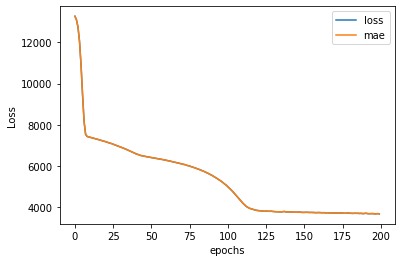

In [ ]:
# Plot History ( also known as a loss curve or a training curve )

pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('epochs')

  OBS || How long should you train for ?

  It depends on the problem you working on. 

###***EarlyStoppingCallback** = is a TensorFlow component you can add to yout model to stop training once it stops improving a certain metric. 

### **Preprocesing Data (Normalization and Standardization)**


  * a) What is Normalization ?
  * b)  What is Standardization ?


  In terms of scaling values, neural network tend to prefer normalization.
  If you're not sure on which to use, you could try both and see which performs better. 

  * a)  Normalization = Converts all values to between 0 and 1 whilst preserving the original distribution. 

  * b) Stanardisation =  Removes the mean and divides each value by the standard deviation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe

insurance  = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


  Prepare my data 

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])   # Pentru "handle_unknown = "ignore => Daca exista coloane pe care "OneHotEncoder" nu le recunoaste, le va ignora. Apoi trec coloanele pentru care vreau sa realizez "OneHotEncoder"
)

# Create X & y values

X = insurance.drop("charges", axis=1) # Ce vreau sa elimin pt a putea prezice
y = insurance["charges"]  # ce vreau sa prezic

# Build the Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Am setat "random_state = 42" pentru a ma asigura ca impartirea se va realiza exact ca mai devreme


# Fit the column transformer to our training data 

# The important thing here is that whenevver u havce some sort of columns transformer, u want to fit it to your training data and then use that fit column transformer to trasform your test data, 
# because otherwise, if u do that separatly, (the test data is data the model is never seen before), if we're transforming our training data set with information from the test data set, it's like taking
# knowledge from the future and altering the data that we have now. 
 
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train.loc[0]  # original 

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal[19]

array([0.73913043, 0.69518429, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

  * The data has been  normalized and one hot encoded. 
  * Next step => build a neural network model on it and see how it goes. 

In [ ]:
# Build a neural network model to fit on our normalized data. 

# Set the random seed so we can have as much reproductibility is as posible.

tf.random.set_seed(42)

# 1. Create a model
 # Voi considera acelasi model ca si model_2, cu deosebirea ca voi folosi la etapa 3 valori normnalizate.

insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model 

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
# Evaluate the insurance_model_4 on normalized data 

insurance_model_4.evaluate(X_train_normal, y_train)  # Evaluarea se faca pe modelul antrenat 

34/34 [==============================] - 0s 3ms/step - loss: 3632.0366 - mae: 3632.0366


[3632.03662109375, 3632.03662109375]